In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import sklearn.neural_network
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
datos = np.array(pd.read_csv('isolet1+2+3+4.data'))

In [3]:
X = datos[:,:-1]
Y = datos[:,-1]

In [4]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.5)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
def log_regression(c,Penalty):
    clf = LogisticRegression(C=c, penalty=Penalty, solver='saga', tol=0.1)
    clf.fit(X_train, y_train)
    return(clf)

In [6]:
Penalty = 'l1'
f1_l1 = []
for i in np.logspace(-4,2,40):
    clf = log_regression(i,Penalty)
    f1_l1.append(sklearn.metrics.f1_score(y_test, clf.predict(X_test), average='macro'))

Text(0.5, 0, 'C')

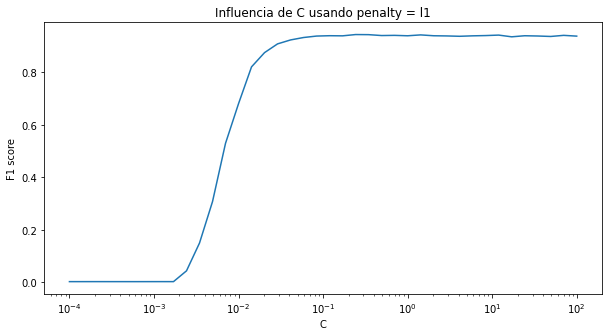

In [7]:
plt.figure(figsize = (10,5))
plt.semilogx(np.logspace(-4,2,40),f1_l1)
plt.title('Influencia de C usando penalty = l1')
plt.ylabel('F1 score')
plt.xlabel('C')

In [8]:
F1_log_regression = np.max(f1_l1)

In [10]:
F1_neural_network = []
for i in range(1,26):
    mlp = sklearn.neural_network.MLPClassifier(activation='logistic', hidden_layer_sizes=(i), max_iter=200)
    mlp.fit(X_train, y_train)
    F1_neural_network.append(sklearn.metrics.f1_score(y_test, mlp.predict(X_test), average='macro'))

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-1694b55046e4>", line 5, in <module>
    F1_neural_network.append(sklearn.metrics.f1_score(y_test, mlp.predict(X_test), average='macro'))
  File "/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 971, in predict
    y_pred = self._predict(X)
  File "/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 685, in _predict
    self._forward_pass(activations)
  File "/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 104, in _forward_pass
    self.coefs_[i])
  File "/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/extmath.py", line 151, in safe_sparse_dot
    ret = a @ b
Keyb

KeyboardInterrupt: 

Text(0.5, 0, 'Número de neuronas')

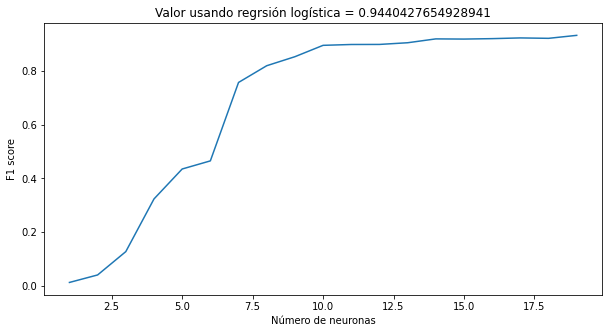

In [17]:
plt.figure(figsize = (10,5))
plt.plot(range(1,len(F1_neural_network)+1),F1_neural_network)
plt.title('Valor usando regrsión logística = {}'.format(F1_log_regression))
plt.ylabel('F1 score')
plt.xlabel('Número de neuronas')